<h1 style="color: indigo">&emsp; Tracer des fractales de Julia :  &emsp;</h1>

Cette fois il s'agit de tracer des fractales, issues **des mathématiques et non de la nature** comme pour les Lsystem.  
Gaston Maurice JULIA est un mathématicien du début du XX eme siècle. Il a travaillé sur les itérations de fonctions complexes.  
Remarque: Il ne disposait pas alors d'ordinateur avec écran graphique pour représenter son travail ;-)  
Dans les années 1970, Benoît MANDELBROT c'est intéressé aux travaux de JULIA et a inventé le terme de fractale.  
Voir: https://fr.wikipedia.org/wiki/Ensemble_de_Mandelbrot

![image](./images/julia.png)

<h3 style="color: DarkBlue"> 1/ Rappel: les équations du second degré : </h3>

La théorie développée par Julia est basée sur les nombres complexes. Ces derniers trouvent leur justification dans la résolution des équations du second degré :  
$a.x² + b.x + c = 0$  
La résolution d'une telle équation se fait par le calcul de son discriminant :  
$\Delta = b² - 4.a.c$  
Le signe de ce dernier nous renseigne sur les solutions de l'équation:  
$\Delta > 0 \rightarrow$ l'équation admet deux racines qui sont distinctes:   $x_1 = (-b +\sqrt \Delta)/2.a$  et  $x_2 = (-b -\sqrt \Delta)/2.a$  
$\Delta = 0 \rightarrow$ l'équation a pour solution une racine double: $x_1 = -b/2.a$  
$\Delta < 0 \rightarrow$ l'équation n'a pas de solution dans l'ensemble des réels: $\mathbb{R}$ ... $\Rightarrow$ mais peut-être dans un autre ensemble, tel que:$\mathbb{C}$  

En résumé:  
![image](./images/Equation2degre.png)
  
$\Rightarrow$ Écrire un script permettant à partir d'une équation donnée par l'utilisateur, de préciser si cette équation a des solutions et leurs valeurs.

In [9]:
'''Résolution de l'équation du 2° degré '''

from math import sqrt

def solve(a, b, c):
    d = b**2 - 4*a*c
    if d<0:
        return set()
    return {(-b-sqrt(d))/(2*a), (-b+sqrt(d))/(2*a)}

a,b,c = (float(x.strip()) for x in input("aX² + bX + c = 0. Entrer a, b, c [format: 'a,b,c']").split(','))
print(f"L'ensemble des solutions est {solve(a,b,c)}.")

L'ensemble des solutions est {2.6666666666666665, -5.0}.


<h3 style="color: DarkBlue">2/ Au secours Valentin : c'est quoi un nombre complexe ? De quoi on parle, tu nous expliques ?</h3>  

Introduction à l'ensemble des complexes:  $\mathbb{C}$

In [ ]:
'''Les nombres complexes avec Python'''

a = int(input('Saisir la partie réelle du nombre complexe z: '))
b = int(input('Saisir la partie imaginaire du nombre complexe z: '))
z = complex(a,b)
print(f'z = {z} \n')
print(f'La partie réelle de z est : {z.real}')
print(f'La partie imaginaire de z est : {z.imag}i \n')
print(f'Le module de z est : {abs(z)}')

<h3 style="color: DarkBlue"> Ce qu'il faut retenir : </h3>  

$\Rightarrow$ Il existe un ensemble $\mathbb{C}$ appelé ensemble des complexes, dans lequel l'ensemble des réels $\mathbb{R}$ est inclus  
Un complexe est définit par deux nombres réels :  
le premier représente la partie réel du complexe, le deuxième sa partie imaginaire à laquelle est associée à la lettre i (ou j) : $z = -2 + 3i$ ou encore $z = -2 + 3j$  

**Propriété de l'imaginaire i** : $~i^2 = -1$ (ou encore : $~j^2 = -1$).  
C'est cette dernière propriété qui permet de résoudre le cas $\Delta < 0$ pour les équations du 2° degré :  
![image](./images/DeltaNegatif.png)

Puisque d'un nombre complexe est constitué de deux parties (partie réelle et partie imaginaire), il est tentant de lui associé un point du plan de tel sorte que :  
- sa partie réelle est portée par l'axe des abscisses (Ox)  
- sa partie imaginaire est portée par l'axe des ordonnées (Oy).  

Ainsi au nombre complexe $z = a + bi$ correspond le point M de coordonnées a et b : $M(a, b)$.  
On dit que : **z est l'affixe du point M**.  

Application: Utiliser le logiciel ```Geogebra``` (sélectionner le mode **Tableur** => voir menu *Affichage*) pour représenter dans **le plan complexe** les points d'affixe :  
$z_1 = 2 + 3i; ~ z_2 = 1; ~ z_3 = -1i = -i$ (ne pas oublier de cocher dans Géogebra : *Afficher l'objet*).

On constate que la distance du point M (affixe de z) à l'origine est donnée par : $\sqrt{a^2 + b^2}$.  
Cette distance représente aussi le module du nombre complexe $~z = a + ib$ :  
$|z| = \sqrt{a^2 + b^2}$

![lien](http://www.jaicompris.com/image/playvideo.png)


<h3 style="color: DarkBlue">3/ Compléter votre algorithme sur la résolution d'une équation du 2° degré :</br>
 =>  Ajouter le cas où le discriminant est négatif </h3>

# Le point maths, par Valentin

## Théorème d'Alembert-Gauss

Tout polynôme non constant à coefficients complexes admet une racine dans $\mathbb{C}$.

$\boxed{\forall P \in \mathbb{C}[X], \deg P \geqslant 1, \exists z \in \mathbb{C} \quad P(z) = 0}$

On peut aussi dire que tout polynôme de $\mathbb{C}[X]$ peut être factorisé, de la forme :

$\displaystyle P(X) = a_n\prod_{k=1}^n (X - a_k)$ (où $n$ est le degré de $P$).

Cela entraîne que la somme des multiplicités des racines distinctes d'un polynôme vaut le degré de ce polynôme.

## Un cas particulier : $\deg P = 2$

Soit $P = aX^2 + bX + c$ et soit $\Delta = b^2 - 4ac$.

Soient $\delta_1$ et $\delta_2$ les deux racines carrées de $\Delta$.

Alors $z_1 = \dfrac{-b-\delta}{2a}$ et $z_2 = \dfrac{-b+\delta}{2a}$ vérifient $P(z_1) = 0$ et $P(z_2) = 0$

Dans le cas où $z_1 = z_2$, on dit que $z_1$ est de multiplicité 2.

Remarquons que $\delta_1 + \delta_2 = 0$.

La fonction python sqrt du module cmath associe à un complexe $z$ une de ses deux racines carrées. Notons $\delta$ une telle racine. Alors $\{\delta, -\delta\}$ est l'image de $z$ par la multifonction (i.e correspondance) qui à un complexe associe ses racines carrées. C'est aussi la coupe du graphe $\{(x, y) \in \mathbb{C}^2 \mid y^2 = x \}$ suivant $\{z\}$. L'application $f: z \mapsto z^2$ n'étant pas injective, la correspondance $f^{-1}$ n'est pas univoque.

In [6]:
'''Résolution d'une équation du second degré dans l'ensemble des complexes'''

from cmath import sqrt

def solve(a, b, c):
    d = b**2 - 4*a*c
    return {(-b-sqrt(d))/(2*a), (-b+sqrt(d))/(2*a)}

solve(1, -1, -1)

{(-0.6180339887498949+0j), (1.618033988749895+0j)}

<h3 style="color: DarkBlue"> 4/ Les suites de Julia :</h3>  

Une **suite d'éléments de $E$** est une application de $\mathbb{N}$ dans $E$. Ces suites sont soit définies explicitement, soit définies par récurrence.
Exemple: $u_{n+1} = u_n * 2 + 3$. On suppose ici que le terme initial est: $u_0 = 1$ :
- $u_0 = 1$
- $u_1 = 5$
- $u_2 = 13$
- ...  

Le calcul d'un terme n d'une suite, avec n très grand, peut-être long et fastidieux.  
$\Rightarrow$ La technologie numérique et les ordinateurs s'avèrent d'une grande aide pour le calcul des suites.  
- Exemple 1 : La suite de Fibonacci, déjà rencontrée en exercice, pour laquelle l'élément $u_n$ dépend de $u_{n-1}$ et $u_{n-2}$  
$\Rightarrow ~f_0 = 0; ~ f_1 = 1  ~~ \Rightarrow ~ f_n = f_{n-1} + f_{n-2}$  

- Exemple 2 : avec le programme du calcul du Lsystem :  
$\Rightarrow$ Voir le code ci-dessous : **mettre en évidence** la ligne permettant le ***calcul de la suite*** des termes du Lsystem: à l'aide d'un commentaire.

In [10]:
def codage_lSystem(chaine: str, ordre: int) -> str:
    """
    Prends en entrée une chaîne initiale (l'axiome) et l'ordre souhaité
    Retourne la chaîne obtenue après n applications du L-system
    """
    for n in range(ordre): # Itérer le lSystem jusqu'à l'ordre n
        chaine = lSystem_convert(chaine)
    return chaine

def lSystem_convert(chaine: str) -> str:
    """
    Prends en entrée une chaîne de caractères
    Retourne la chaîne obtenue après application des règles du L-System
    """
    rules = {'A': 'AB', 'B': 'A'}  # A compléter : règles
    return ''.join([rules[car] for car in chaine ]) 

axiome = 'A'
for k in range (5): # Pour affichage des générations jusqu'à l'ordre n
    print(f'ordre {k} => {codage_lSystem(axiome, k)}')

ordre 0 => A
ordre 1 => AB
ordre 2 => ABA
ordre 3 => ABAAB
ordre 4 => ABAABABA


<h3 style="color: DarkBlue">5/ Les ensembles de Julia : </h3>

Un ensemble de Julia $J(c)$ est défini à partir d'une suite ```complexe```, et consiste à voir si la suite $u_n$ "s'échappe" d'un domaine donné, lorsque n augmente.  
Exemple : on considère la suite de Julia telle que:  
- $u_0 = z$
- $u_{n+1} = u_n ^2 + c$  

Dans laquelle $~z~$ et $~c~$ sont des nombres complexes : $~~z = a + bi~~$  et  $~~c = p + qi$ , avec :  
- $~z~\Rightarrow$ qui représente la valeur initiale de la suite $u_0$ ;
- $~c~\Rightarrow$ un paramètre (sous forme *complexe*) de la suite de Julia.


In [11]:
def suiteJulia(z: complex, c: complex) -> complex :
    """
    Calcul de la suite de Julia: 
    En entrée: z et c sont des complexes.
    Retourne un complexe.
    """
    u = z
    print(f'u0 = {(u.real)} + {(u.imag)} i')
    for i in range (20):
        u = u **2 + c
        print(u)

z = complex(0, 0)
suiteJulia(z, complex(-0.5, 0.6))

u0 = 0.0 + 0.0 i
(-0.5+0.6j)
(-0.61+0j)
(-0.1279+0.6j)
(-0.84364159+0.44652j)
(0.012351021977728305-0.1534056855336j)
(-0.5233807566101395+0.596210566012932j)
(-0.5815396226356586-0.024090274277615786j)
(-0.1623920086195465+0.6280188980251884j)
(-0.8680365718132812+0.396029499397311j)
(0.09664812561246894-0.08753617798754354j)
(-0.49832172227226335+0.5830795849484489j)
(-0.5916572634952607+0.018877554013384867j)
(-0.1502980445988279+0.5776619161019134j)
(-0.8111037871043028+0.42635708714134046j)
(-0.02389101230070656-0.091639696078201j)
(-0.5078270534285525+0.6043787302124746j)
(-0.6073853333393171-0.013839739437382148j)
(-0.13127459523198132+0.6168121095030072j)
(-0.8632241590762293+0.43805647998161634j)
(0.05326246915897892-0.1562818731200477j)


<h3 style="color: DarkBlue">6/ Analyse et exploitation des résultats : </h3>
<h4 style="color: SeaGreen" class="fa fa-book">61/ Mise en place des points dans le plan complexe : <mark style="color: DarkBlue"> => avec Geogebra : </mark></h4>

Examiner les valeurs obtenues en retour à l’exécution du code précédent.  
Utiliser le logiciel ```Géogebra``` pour placer directement dans le *plan complexe*, les points obtenus : => tester tout d'abord pour un point, saisie en mode tableur et sans oublier de cocher "Afficher l'objet".  
***Remarque*** : *Le mode tableur de ```Géogebra``` accepte de charger des points à partir d'un fichier, .dat par exemple (clic droit).*  
**Cependant cette fonctionnalité dépend de la version de ```Géogebra``` à votre disposition:** *si votre version ne propose pas cette fonctionnalité, vous pouvez réaliser cette partie avec : Matplotlib*.  
**Remarque** : Matplolib est moins adapté, puisqu'il vous faudra vous même mettre en place les points dans le plan complexe, à l'aide de leur partie réelle et partie imaginaire.  

Afin de pouvoir charger les points à partir d'un fichier, il faut adapter le code ci-dessus afin d'enregistrer les points dans un fichier ```Julia.dat``` et transformer le type ```complex``` de Python pour l'adapter au type reconnu par ```Géogebra``` :  
$~a+bj \Rightarrow a+bi~$.  
A voir : l'exercice sur le tracé d'une spirale dans les activités de révision et aussi [ici](https://python.doctor/page-lire-ecrire-creer-fichier-python "python.doctor: lire ecrire dans un fichier").

In [17]:
" Saisir ici le code précédent, adapté pour générer un fichier : Julia.dat => et l'importer dans Géogebra "

def suiteJuliaFichier(z: complex, c: complex) -> complex :
    """
    Calcul de la suite de Julia: 
    En entrée: z et c sont des complexes.
    Retourne un complexe.
    """
    with open('Julia.dat', 'w') as file:
        u = z
        print(f'u_0 = {(u.real)} + {(u.imag)} i', file=file)
        for i in range (20):
            u = u **2 + c
            print(f'u_{i+1} = {(u.real)} + {(u.imag)} i', file=file)
    return z
z = complex(0, 0)
suiteJuliaFichier(z, complex(-0.5, 0.6))

0j

<h4 ><mark style= "color: DarkBlue"> => avec Matplotlib : </mark></h4>

Pour représenter les points avec Matplotlib, il vous faut extraire la partie réel et la partie imaginaire des résultats renvoyé par la fonction ```suiteJulia()```.  
**=> Compléter le code suivant :**

u0 = 0.0 + 0.0 i


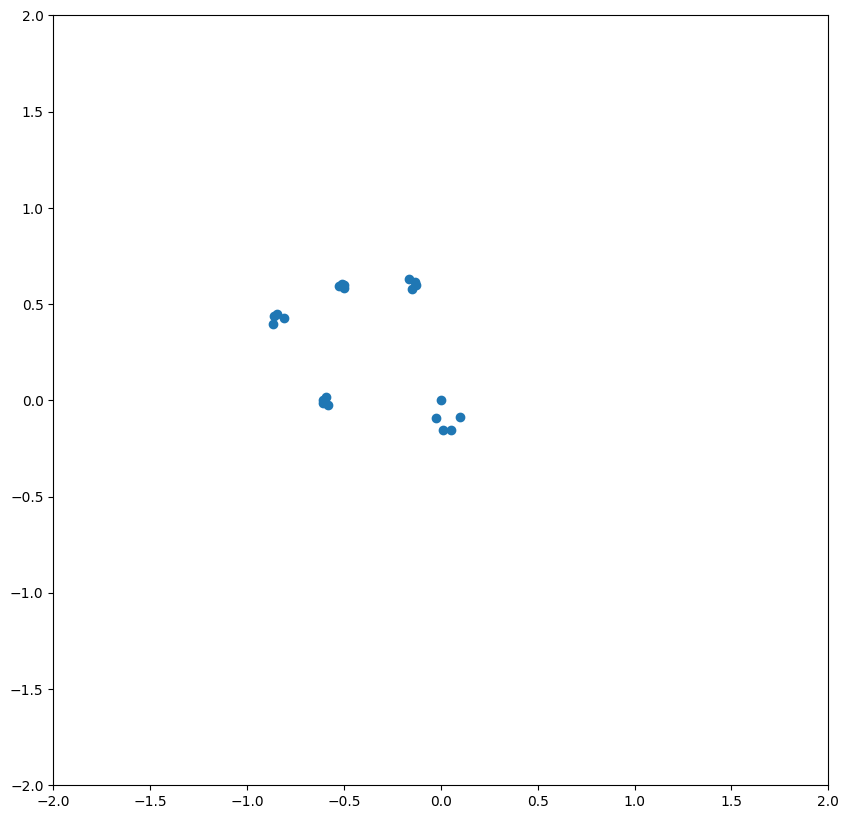

In [22]:
"Représentation des point dans le plan complexe, avec Matplotlib :"

import matplotlib.pyplot as plt

def suiteJulia(u: complex, c: complex) -> 'list[complex]' :
    """
    Calcul de la suite de Julia: 
    En entrée: z et c sont des complexes.
    Retourne une liste de complexes.
    """
    u = z
    s = [u]
    print(f'u0 = {(u.real)} + {(u.imag)} i')
    for i in range (20):
        u = u **2 + c
        s.append(u)
    return s

def tracer_les_points(listePoints):
    "Pour tracer les points :"
    plt.figure(figsize=(10,10))
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.scatter([z.real for z in listePoints], [z.imag for z in listePoints])
    plt.show()
    plt.close()

u = complex(0, 0)
tracer_les_points(suiteJulia(u, complex(-0.5, 0.6)))

<h4 style="color: SeaGreen" class="fa fa-book">62/ Le point d'affixe z = 0 + 0i appartient-il à l'ensemble de Julia J(c) ? </h4>
<h4><mark style="color: DarkBlue"> => avec Geogebra : </mark></h4>

Pour le savoir : tracer dans ```géogebra``` un cercle de centre 0 et de rayon 2. Si les points de la suite sont dans ce cercle, c'est donc que le point z appartient à l'ensemble de Julia (du moins en ce qui concerne les vingts premiers termes de la suite).  

Essayer maintenant la suite, pour laquelle: $~z = 0.239 + 0.2i~$ et $~c = -0.5 + 0.6i$  
Cette fois vous devriez constater que les dernières valeurs de la suite "s'échappent" du cercle.  
$\Rightarrow$ On en déduit que le point M d'affixe $~z = 0.239 + 0.2i~$ n'appartient pas à l'ensemble J(c).  

<h4 ><mark style= "color: DarkBlue"> => avec Matplotlib : </mark></h4>

Reprendre les étapes décrites ci-dessus en les adaptant à Matplotlib **=> compléter le code ci-dessous:**

u0 = 0.0 + 0.0 i
u0 = 0.0 + 0.0 i


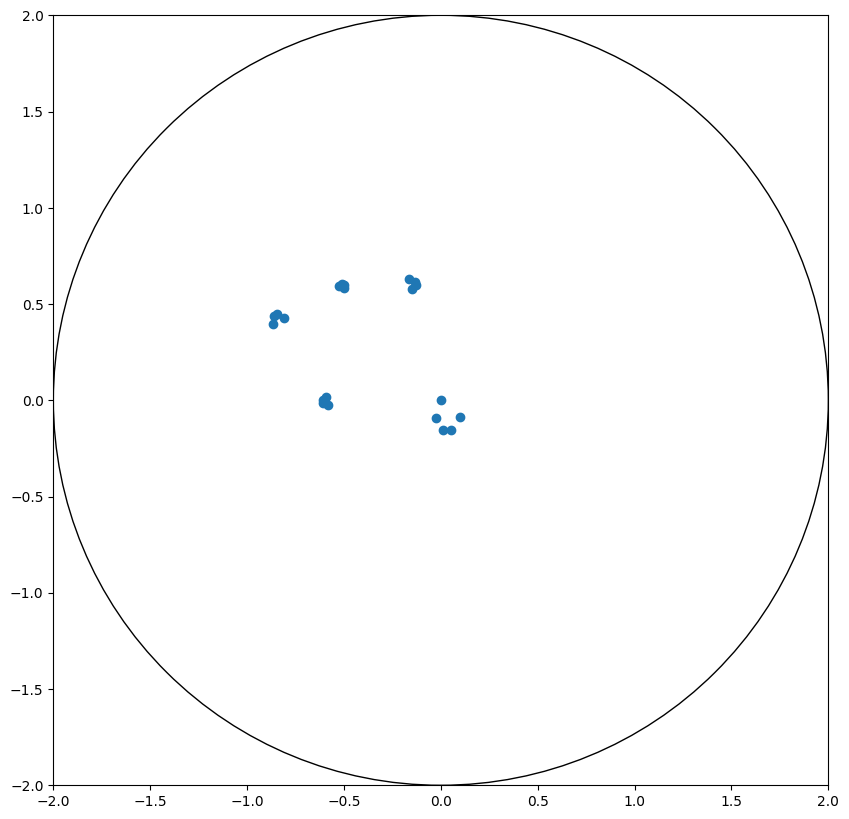

In [27]:
"Savoir si un point z appartient à l'ensemble de Julia J(c) :"

import matplotlib.pyplot as plt

def suiteJulia(u: complex, c: complex) -> 'list[complex]' :
    """
    Calcul de la suite de Julia: 
    En entrée: z et c sont des complexes.
    Retourne une liste de complexes.
    """
    u = z
    s = [u]
    print(f'u0 = {(u.real)} + {(u.imag)} i')
    for i in range (20):
        u = u **2 + c
        s.append(u)
    return s

def tracer_les_points(listePoints):
    "Pour tracer les points :"
    plt.figure(figsize=(10,10))
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.scatter([z.real for z in listePoints], [z.imag for z in listePoints])
    cercle = plt.Circle((0, 0), 2,fill=False)
    plt.gcf().gca().add_artist(cercle)
    plt.show()
    plt.close()
"""
def cercle_limite():
    cercle = plt.Circle((0, 0), 2,fill=False)
    plt.gcf().gca().add_artist(cercle)  #gca = Get Current Axis
    plt.show()
    plt.close()
"""
u = complex(0, 0)
suiteJulia(u, complex(-0.5, 0.6))
tracer_les_points(suiteJulia(u, complex(-0.5, 0.6)))

<h4 style="color: SeaGreen" class="fa fa-book">63/ Savoir si un point appartient à l'ensemble de Julia : </h4>

Pour savoir si un point $M$ d'affixe $z$ appartient à l'ensemble de Julia J(c), on peut se limiter à examiner ***le module $u_n$*** de la suite de Julia :  
D'après la définition du module d'un nombre complexe (distance du point $M$ d'affixe $z = a + jb$, à l'origine $O$ du plan complexe), regarder si un point de la suite "s'échappe" du domaine de Julia, limité par le cercle de centre $0$ et de rayon 2, revient à examiner si **le module du complexe $~u_n~$ calculé est supérieur à 2**.  
On peut d'ailleurs démontrer que la suite tend vers l'infini (n'appartient donc pas à J(c)) lorsque justement ses termes $u_n$ sortent du cercle de rayon 2, centré en $O$.  

Appliquer cette propriété pour examiner et conclure sur l'évolution de $|u_n|$ pour les valeurs de $~z~$ et du paramètre $~c~$ suivantes :

In [29]:
'''Modifier le code de la fonction suite de Julia afin d'afficher 20 itérations du module de u => abs(u)
Ceci pour les valeurs suivantes de la suite :
z = 0 + 0i et c = -0.5 + 0.6i
z = 0.239 + 0.2i et c = -0.5 + 0.6i
z = 0.25 + 0.2i et c = -0.5 + 0.6i
'''

def suiteJulia(z: complex, c: complex) -> complex :
    """
    Calcul de la suite de Julia: 
    En entrée: z et c sont des complexes.
    Retourne un complexe.
    """
    u = z
    print(f'u0 = {(u.real)} + {(u.imag)} i')
    for i in range (20):
        u = u **2 + c
        print(abs(u))

z = complex(0, 0)
suiteJulia(z, complex(-0.5, 0.6))

u0 = 0.0 + 0.0 i
0.7810249675906654
0.61
0.6134805701894722
0.9545214731883868
0.15390208607399739
0.7933438443797638
0.5820383784682888
0.6486747264540702
0.9541105042909015
0.13039724936159686
0.7670113045268956
0.5919583427000827
0.5968942884001868
0.9163349383334626
0.0947027685237214
0.789406084171619
0.6075429874036964
0.6306268292602768
0.9680131344495009
0.16510879590991473


<h3 style="color: DarkBlue">7/ Construction des fractales de Julia : </h3>
<h4 style="color: SeaGreen">71/ Calculer l'ensemble de Julia : </h4>

**Écrire une fonction ```ensembleJulia```** qui devra itérer 100 fois (ou plus) le calcul de la suite de Julia à partir du point $~M~$ d'affixe $~z~$ et du paramètre $~c~$.  
Cette fonction doit renvoyer :  
- -1 si le point $M$ appartient à J(c) => dans ce cas toutes les itérations donnent un module inférieur à 2;
- l'indice i du tour de boucle qui correspond au premier terme de la suite supérieur à 2.  

In [30]:
def ensembleJulia (z: complex, c: complex) -> int :
    '''Prend une suite de Julia et un point d'affixe z :
    Retourne => -1 si le point est dans l'ensemble J(c): le module de tous les termes est < 2
    Retourne l'indice i du premier terme ayant un module supérieur à 2
    '''

    u = z
    print(f'u0 = {(u.real)} + {(u.imag)} i')
    for i in range (20):
        u = u **2 + c
        if abs(u) > 2:
            return i
    return -1

<h4 style = 'color: SeaGreen'> 72/ Changement de repère :</h4>

Puisqu'il s'agit de tracer une image à l'écran, nous allons faire en sorte que les points $M$ (de la suite de Julia) appartiennent à l'écran de l'ordinateur. Donc le plan complexe sera représenté par l'écran de l'ordinateur.  
L'écran est constitué de pixels ayant $x$ et $y$ pour coordonnées. Les dimensions de l'image de la fractale seront comprises entre 0 et 400 pixels pour $x$ et pour $y$.  
Les ensembles de Julia intéressant sont pour $z = a + ib$ ayant une partie réelle $a$ et une partie imaginaire $b$ comprises entre -1.25 et +1.25.  
Un changement de repère est donc nécessaire pour faire correspondre la partie du plan complexe pertinente (-1.25 -> +1.25) avec les pixels de notre image fractale (0 -> 400).  

![image](./images/ChgntRepere.png)


**Établir les équations** pour passer de l'image en pixel, à la valeur de $z$, et **écrire** la fonction ```convert``` correspondante :


In [ ]:
def convert(x:int, y:int) ->complex :
    "Convertit un point du plan (de l'image) de coordonnées x, y en un nombre complexe z = re + img*j"
    return complex(x/160 - 1.25, y/160 - 1.25)

<h4 style = 'color: SeaGreen'> 73/ Gestion des couleurs :</h4>

A chaque point de notre fractale correspond un affixe $z$ utilisé dans la fonction ```ensembleJulia``` pour savoir si ce point appartient ou pas à J(c).  
Nous allons affecter une couleur à ce point, en fonction de sont appartenance ou pas à J(c). Dans ce dernier cas, sa couleur sera fonction du rang du terme pour lequel il s'échappe de J(c).  
*Rappel: la couleur d'un pixel est définie par un triplet de nombres, chacun compris entre 0 et 255.*  
Principe: si n représente le nombre renvoyé par la fonction ```ensembleJulia```:
- si n=-1 le pixel correspondant est noir.
- et pour 0< n <100 :  
=> la couleur (n, n , n) donnera un dégradé allant de noir à gris moyen (100, 100, 100)  
=> la couleur (2n, 0 , 0) donnera un dégradé allant de noir au rouge vif (200, 0, 0)  
=> la couleur (0, 0, 3n%256) donnera un premier dégradé allant de noir au bleu vif (0, 0, 255), puis lorsque 3n dépasse 255 on reviend à zéro, jusqu'à atteindre la couleur (0, 0, 44) pour n=100.  

Pour commencer nous allons faire un "mix" de tout cela, soit par exemple : (4n%256, 2n, 6n%256).  
Puis tester aussi la formule suivante: (255-log10(n)x127, 255-log10(n)x127, log10(n)x127).  
Et pourquoi pas tester aussi une variante personnelle.  

**Écrire une fonction ```colorise```** permettant de fixer une couleur (d'après les formules ci-dessus) à chaque pixel d'un rectangle, en fonction d'une valeur de $n$, avec $-1<n<100$ :  

In [37]:
from PIL import Image
from math import log10, sqrt

from random import randint

def colorise(img, taille):
    "Colorise un carré de pixel, avec des bandes, selon les formules proposées ci-dessus :"
    
    for x in range(400):
        for y in range(400):
            n = int(sqrt((x-200)**2 + (y-200)**2)) # essayer de faire un truc joli
            if n == -1:
                img.putpixel((x, y), (0,0,0))
            else:
                img.putpixel((x, y), (4*n%256, 2*n, 6*n%256))

    # Faire appel aux méthodes :
    # putpixel(); save() et show()
    # Voir : #https://info.blaisepascal.fr/pillow

taille = 400
img = Image.new('RGB',(taille,taille),(255,255,255))
colorise(img, taille)
img.show()

<h4 style = 'color: SeaGreen'> 74/ Association des fonctions précédentes :</h4>

Associer les fonctions précédentes pour obtenir le tracé des fractales de Julia.  
La fonction ```dessineFractale``` est une évolution de la fonction ```colorise``` qui gère le tracé (position et couleur de chaque pixel) de la fractale de Julia, à l'aide des fonctions : ```convert``` et ```ensembleJulia```.  
Tester les fractales pour les valeurs du paramètre $c$ successivement égal à :  
- $-0.5+0.6i$
- $-0.8-0.18i$
- $0-0.8i$
- $0.285+0.013i$


In [53]:
from PIL import Image
from math import log10

#***Déclaration des constantes :***
taille = 1000
reMax = -0.5
reMin = 0.5
imgMax = -0.5
imgMin = 0.5

#***Déclaration des fonction locales :***
def ensembleJulia (z: complex, c: complex) -> int :
    '''Prend une suite de Julia et un point d'affixe z :
    Retourne => -1 si le point est dans l'ensemble J(c): le module de tous les termes est < 2
    Retourne l'indice i du premier terme ayant un module supérieur à 2
    '''
    u = z
    for i in range (20):
        u = u **2 + c
        if abs(u) > 2:
            return i
    return -1

def convert(x:int, y:int, taille:int) ->complex :
    "Convertit un point du plan (de l'image) de coordonnées x, y en un nombre complexe z = re + img*j"
    return complex(x*(reMax-imgMin)/taille - (reMax-reMin)/2, y*(imgMax-imgMin)/taille - (imgMax-imgMin)/2)

def dessineFractale(img, taille, c):
    "Construit la fractale à partir d'une carré de pixels à colorer en fonction de la valeur de n :"
    for x in range(taille):
        for y in range(taille):
            n = ensembleJulia(convert(x, y, taille), c)
            if n == -1:
                img.putpixel((x, y), (0,0,0))
            else:
                img.putpixel((x, y), (4*n%256, 2*n, 6*n%256))

#*** Programme principal :***
"Tester les fractales pour le paramètre c = -0.5+0.6j; -0.8-0.18j; 0-0.8j; 0.285+0.013j "
img = Image.new('RGB',(taille,taille),(255,255,255))
dessineFractale(img, taille, 0-0.8j)
img.show()

<h3 style="color: DarkBlue">8/ Mise en évidence de la structure de la fractale : </h3>

Une figure fractale est un objet mathématique qui présente une structure similaire à toutes les échelles.  
A partir d'une fractale de niveau 0, vérifier qu'il est possible d'obtenir une fractale de niveau 1, puis 2 et ainsi de suite :  
=> Pour cela adapter les constantes du script (taille etc...) pour zoomer de plus en plus.


<h3 style="color: DarkBlue">9/ Ensemble de Mandelbrot : </h3>

Prolongement possible aux ensembles de Julia : $\Rightarrow$ les ensembles de Mandelbrot.  
A voir :
- https://fr.wikipedia.org/wiki/Ensemble_de_Mandelbrot
- le logiciel Xaos.